In [1]:
%load_ext autoreload
%autoreload 2
from geosnap.data import Community

## Data prep

In [2]:
dc = Community.from_lodes(state_fips='11', years=[2010,2015])

/Users/knaaptime/projects/geosnap/geosnap/data/data.py:113: UserWarning: Unable to locate local census 2000 block data. Streaming instead.
If you plan to use census data repeatedly you can store it locally with the data.store_blocks_2000 function for better performance
  "Unable to locate local census 2000 block data. Streaming instead.\n"
/Users/knaaptime/projects/geosnap/geosnap/data/data.py:166: UserWarning: Unable to locate local census 2010 block data. Streaming instead.
If you plan to use census data repeatedly you can store it locally with the data.store_blocks_2010 function for better performance
  "Unable to locate local census 2010 block data. Streaming instead.\n"


In [3]:
dc_tracts = Community.from_census(state_fips='11', years=2010)

In [4]:
# tract level data from 2010, this is the source
tracts = dc_tracts.gdf

In [5]:
# block level data from 2015, this is the target
blocks = dc.gdf[dc.gdf.year==2015]

In [6]:
# original block-level data for 2010, this is the ground truth
test = dc.gdf[dc.gdf.year==2010]

In [7]:
#rename this variable so its the same on blocks/tracts
tracts['population'] = tracts["n_total_pop"]

In [9]:
# community with mixed geoms
hybrid = Community.from_geodataframes([blocks, tracts])

## Harmonizing a community

In [12]:
# this wil take the 2010 tract data and interpolate it to 2015 boundaries (the same as 2010)
# using pure area interpolation here

hybrid_area = hybrid.harmonize(2015, extensive_variables=['population'])

In [13]:
# this will do the same as above, but will use 2011 NLCD data to constrain the overlay to what's considered developed land

hybrid_raster = hybrid.harmonize(2015, extensive_variables=['population'], weights_method='land_type_area')

/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/knaaptime/anaconda3/envs/geosnap/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/knaaptime/projects/tobler/tobler/area_weighted.py:439: UserWarning: The CRS for the generated union will be set to be the same as source_df.
  "The CRS for the g

In [15]:
interpolated_area = hybrid_area.gdf[hybrid_area.gdf.year==2010]
interpolated_raster = hybrid_raster.gdf[hybrid_raster.gdf.year==2010]

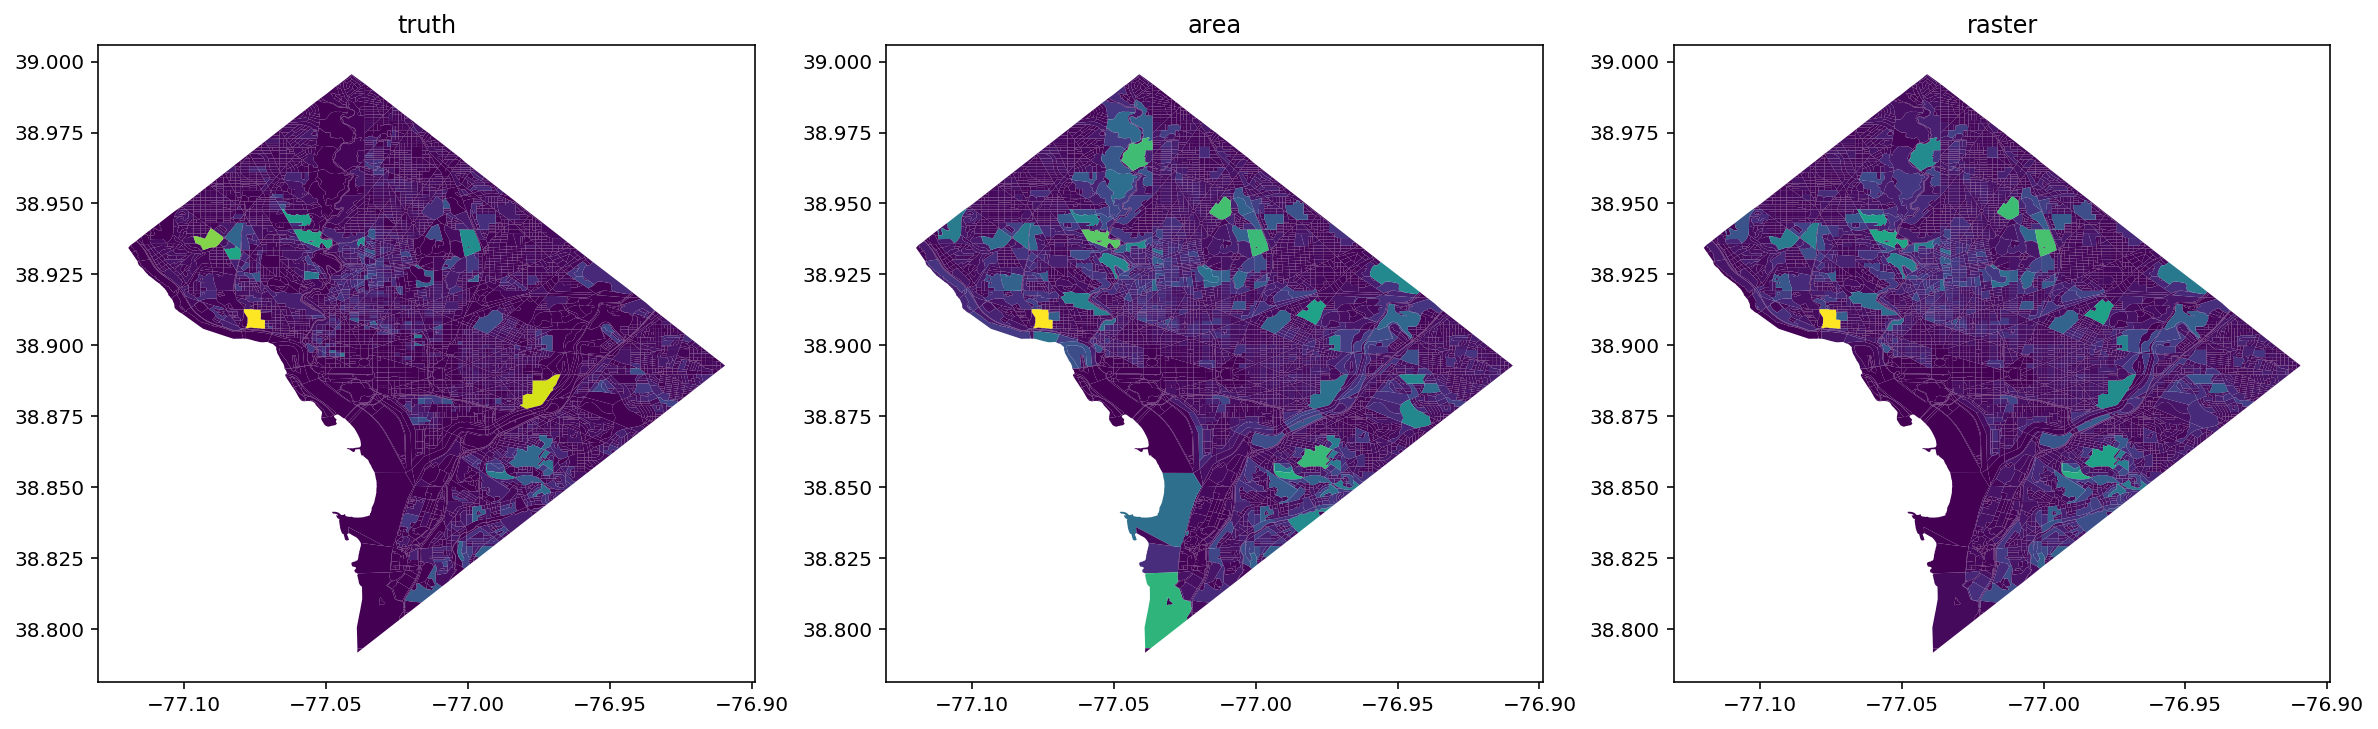

In [17]:
import matplotlib.pyplot as plt
fig , axs = plt.subplots(1,3, figsize=(20,8))
titles = ['truth', 'area', 'raster']
for i, data in enumerate([test, interpolated_area, interpolated_raster]):
    data.plot('population', ax=axs[i])
    axs[i].set_title(titles[i])

count    6507.000000
mean       -0.620255
std       150.854503
min     -1888.137144
25%       -26.565505
50%        -1.940125
75%        27.854591
max      2579.146774
Name: population, dtype: float64

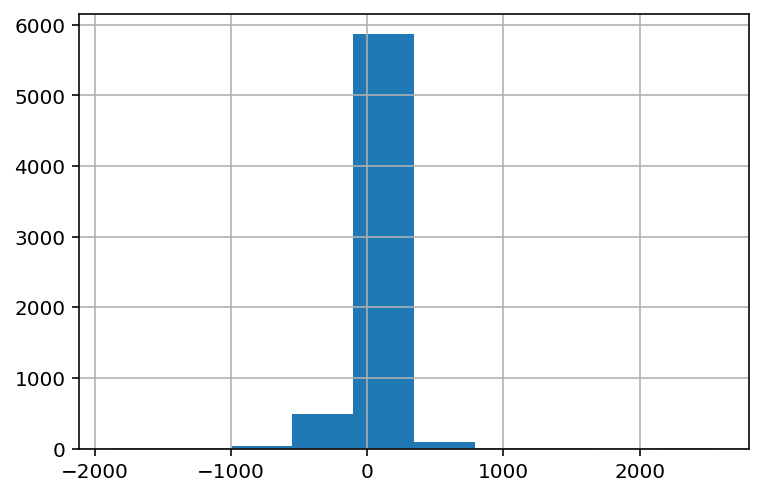

In [21]:
diff = test.population - interpolated_area.population

diff.hist()
diff.describe()

count    6507.000000
mean       -0.620255
std       133.378340
min     -1603.965354
25%       -29.273118
50%        -3.137143
75%        22.574749
max      2273.991111
Name: population, dtype: float64

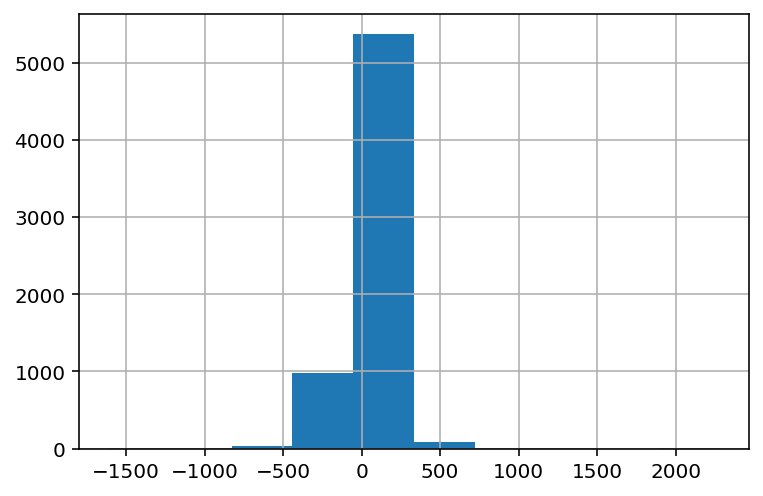

In [22]:
diff = test.population - interpolated_raster.population

diff.hist()
diff.describe()